# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

In [58]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [59]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [60]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [61]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


## Question: Does race have a significant impact on callbacks for resumes?

First, we can look at a simple bar plot of the fraction of resumes that received callbacks by race. Looking at this figure below, it does appear that there is a difference between the races. We can do a statistical test on the data to determine if the difference is significant.

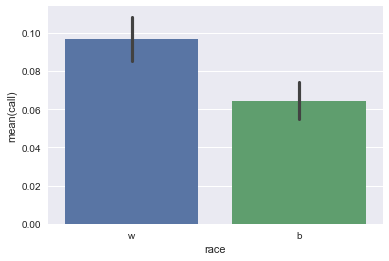

In [62]:
_=sns.barplot(x= "race", y="call", data=data)

### 1. What test is appropriate for this problem? Does CLT apply?

For this problem the appropriate test would be a two proportion z test. To use this test, the standard is usually to have at least 5 successes and failures for each sample. We can see below that we have more than enough, so we can assume that the samples come from a normal distribution.

In [63]:
count=[sum(data[data.race=='b'].call), sum(data[data.race=='w'].call)]
nobs=[len(data[data.race=='b']), len(data[data.race=='w'])]
print('b callbacks:', count[0], ' w callbacks:', count[1])
print('b total:', nobs[0], '      w total:', nobs[1])

b callbacks: 157.0  w callbacks: 235.0
b total: 2435       w total: 2435


### 2. What are the null and alternate hypotheses?

H0: p1 = p2
Ha: p1 != p2

The null hypothesis is that the proportion of callbacks is the same for both races. The alternative hypothesis is that the proportions are different.

### 3. Compute margin of error, confidence interval, and p-value.

Below we calculate the confidence intervals for each race, at the default 95% confidence. We also perform a z test on the data.

In [64]:
#Calculate the confidence interval and margin of error
b_call = sms.proportion_confint(count[0], nobs[0])
w_call = sms.proportion_confint(count[1], nobs[1])
print('b confidence interval:',b_call, ' Margin of error:', (b_call[1]-b_call[0])/2)
print('w confidence interval:',w_call, ' Margin of error:', (w_call[1]-w_call[0])/2)

b confidence interval: (0.054721407262367537, 0.074231364811554429)  Margin of error: 0.00975497877459
w confidence interval: (0.084780674296387401, 0.10823780619642574)  Margin of error: 0.01172856595


In [65]:
z_score, p_value = sms.proportions_ztest(count, nobs)
print('z-score: ',z_score, ' p-value: ', p_value)

z-score:  -4.10841215243  p-value:  3.98388683759e-05


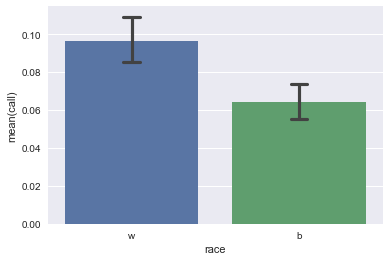

In [66]:
_=sns.barplot(x= "race", y="call", data=data, capsize=.1)

### 4. Write a story describing the statistical significance in the context or the original problem.

We have found that with 95% confidence the proportion of black resumes that get callbacks is between 0.055 and 0.074, and the proportion of white resumes that get callbacks is between 0.085 and 0.108. There is no overlap in the confidence intervals, which we can also visualize on the plot above.

The z test gave us a p-value that is very small, much less than 0.001. This means that we can reject the null hypothesis, and say that there is a statistically significant difference between the proportion of white resumes that get callbacks, and the proportion of black resumes that get callbacks.

These results indicate that race is a factor in whether resumes get callbacks.

### Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

This analysis does not really tell us that race/name is the most important factor. There are a lot of other factors, such as sex, education, years of experience, and others that can also greatly affect whether a resume gets a callback. There is also the possibility of factors correlating with and affecting each other. To really determine the importance of race in callbacks, we would need to look at the effect of other factors on callbacks, and also look at any potential correlation between the other factors.